### Universidad Santo Tomás

#### Visualización ciencia de datos en python

##### Entrega Primer Proyecto

###### Participantes:

__Juan D. Sarmiento-Páramo__

__María Alejandra Bolivar Cardenas__

__Gabriela Cortés Merchán__

###### Data:
La data fue tomada de [Datos Abiertos](https://www.datos.gov.co/Justicia-y-Derecho/Conteo-de-Procesos/q6re-36rh) el 10/03/2021
  

### Limpieza de la data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #Mostrar todas las columnas

Se referencia los [Datos abiertos justicia y derecho conteos de procesos](https://www.datos.gov.co/Justicia-y-Derecho/Conteo-de-Procesos/q6re-36rh) adicionalmente podemos encontrar la tabla de contenido, del significado de cada variable

In [2]:
df_CONTEO = pd.read_csv('PROCESOS.csv', 
                 sep = ',', parse_dates= True,
                        thousands=',', decimal='.',
                      
                 )
df_CONTEO.head()

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,DEPARTAMENTO,MUNICIPIO,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
0,SI,NO,NO,ACTIVO,INDAGACIÓN,2017,2017,2016,Ley 906,Colombia,Cundinamarca,FACATATIVÁ,DIRECCIÓN SECCIONAL DE CUNDINAMARCA,FALSEDAD EN DOCUMENTO,FALSEDAD IDEOLOGICA EN DOCUMENTO PUBLICO. ART....,NO,NO,NO,NO,NO,NO,1
1,SI,NO,NO,ACTIVO,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO. ART. 239 C.P. AGRAVADO CUANDO LO HURTAD...,NO,NO,NO,NO,NO,NO,891
2,SI,NO,NO,ACTIVO,JUICIO,2020,2020,2020,Ley 906,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO CALIFICADO MENOR CUANTIA ART. 240 C.P. ...,NO,SI,NO,NO,NO,NO,284
3,SI,NO,NO,INACTIVO,EJECUCIÓN DE PENAS,2017,2017,2017,Ley 906,Colombia,Huila,LA PLATA,DIRECCION ESPECIALIZADA CONTRA ORGANIZACIONES ...,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,SI,NO,SI,NO,1
4,SI,NO,NO,INACTIVO,INDAGACIÓN,2011,2011,2011,Ley 1098,Colombia,Antioquia,MEDELLÍN,DIRECCIÓN SECCIONAL DE MEDELLÍN,SEGURIDAD PUBLICA,OBSTRUCCION A VIAS PUBLICAS QUE AFECTAN EL ORD...,NO,NO,NO,NO,NO,NO,1


Dimencion de los datos

In [3]:
print('CONTEO')
print('Filas: ', df_CONTEO.shape[0])
print('Columnas: ', df_CONTEO.shape[1])

CONTEO
Filas:  2062369
Columnas:  22


Atributos y tipos de atributo

In [4]:
df_CONTEO.dtypes

HECHO                         object
RUPTURA                       object
CONEXO                        object
ESTADO_NOTICIA                object
ETAPA                         object
ANIO_DENUNCIA                  int64
ANIO_ENTRADA                   int64
ANIO_HECHO                     int64
LEY                           object
PAIS                          object
DEPARTAMENTO                  object
MUNICIPIO                     object
SECCIONAL                     object
GRUPO_DELITO                  object
DELITO                        object
CAPTURA                       object
IMPUTACION                    object
CONDENA                       object
ATIPICIDAD_INEXISTENCIA       object
ACUSACION                     object
HOMICIDIO_DOLOSO_CONSUMADO    object
TOTAL_PROCESOS                 int64
dtype: object

## Completitud

Valores faltantes

In [5]:
for col in df_CONTEO.columns:
    num_missing = df_CONTEO[col].isnull().sum()  
    pct_missing = np.mean(df_CONTEO[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

HECHO - 0.0% - 0
RUPTURA - 0.0% - 0
CONEXO - 0.0% - 0
ESTADO_NOTICIA - 0.0% - 1
ETAPA - 0.0% - 41
ANIO_DENUNCIA - 0.0% - 0
ANIO_ENTRADA - 0.0% - 0
ANIO_HECHO - 0.0% - 0
LEY - 0.0% - 0
PAIS - 0.0% - 18
DEPARTAMENTO - 0.0% - 18
MUNICIPIO - 0.0% - 18
SECCIONAL - 0.72% - 14913
GRUPO_DELITO - 0.0% - 0
DELITO - 0.0% - 0
CAPTURA - 0.0% - 0
IMPUTACION - 0.0% - 0
CONDENA - 0.0% - 0
ATIPICIDAD_INEXISTENCIA - 0.0% - 0
ACUSACION - 0.0% - 0
HOMICIDIO_DOLOSO_CONSUMADO - 0.0% - 0
TOTAL_PROCESOS - 0.0% - 0


visualizar los valores faltantes para los porcentajes que son 0.0%

+  *ESTADO_NOTICIA:*  
Se evidencia que el dato 949355 es el dato de valor faltante para la variable estado de noticia 

In [6]:
df_CONTEO[df_CONTEO["ESTADO_NOTICIA"].isnull() == True]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,DEPARTAMENTO,MUNICIPIO,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
949355,SI,NO,NO,NaN,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,FALSEDAD EN DOCUMENTO,FALSEDAD EN DOCUMENTO PRIVADO. ART. 289 C.P.,NO,NO,NO,NO,NO,NO,1


+  *ETAPA:*  
Se evidenciaron  41  datos de valor faltante para la variable etapa

In [7]:
df_CONTEO[df_CONTEO["ETAPA"].isnull() == True]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,DEPARTAMENTO,MUNICIPIO,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
84424,SI,NO,NO,INACTIVO,NaN,2010,2010,2010,Ley 906,Colombia,Santander,BUCARAMANGA,DIRECCIÓN SECCIONAL DE SANTANDER,"FABRICACION, TRAFICO Y PORTE DE ARMAS","FABRICACION, TRAFICO Y PORTE DE ARMAS DE FUEGO...",SI,SI,NO,NO,SI,NO,1
102455,SI,NO,NO,INACTIVO,NaN,2011,2011,2011,Ley 906,Colombia,Caldas,MANIZALES,DIRECCIÓN SECCIONAL DE CALDAS,PATRIMONIO ECONOMICO,PERTURBACION DE LA POSESION SOBRE INMUEBLE. AR...,NO,SI,NO,NO,NO,NO,1
127536,NO,SI,NO,ACTIVO,NaN,2012,2012,2012,Ley 906,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,"FABRICACION, TRAFICO Y PORTE DE ARMAS","FABRICACION, TRAFICO Y PORTE DE ARMAS DE FUEGO...",SI,SI,NO,NO,SI,NO,1
200711,SI,NO,NO,INACTIVO,NaN,2013,2013,2013,Ley 906,Colombia,Cundinamarca,GIRARDOT,DIRECCIÓN SECCIONAL DE CUNDINAMARCA,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,NO,NO,NO,NO,1
205953,SI,NO,NO,INACTIVO,NaN,2013,2013,2013,Ley 906,Colombia,Chocó,QUIBDO,DIRECCIÓN SECCIONAL DE CHOCÓ,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,NO,SI,NO,NO,NO,NO,1
245402,NO,SI,NO,ACTIVO,NaN,2012,2013,2012,Ley 906,Colombia,Atlántico,BARRANQUILLA,DIRECCION ESPECIALIZADA CONTRA ORGANIZACIONES ...,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,SI,NO,NO,NO,1
310647,SI,NO,NO,INACTIVO,NaN,2012,2012,2012,Ley 906,Colombia,Caldas,MANIZALES,DIRECCIÓN SECCIONAL DE CALDAS,PATRIMONIO ECONOMICO,USURPACION DE TIERRAS. ART. 261 C.P.,NO,SI,NO,NO,SI,NO,1
334230,SI,NO,NO,INACTIVO,NaN,2013,2013,2013,Ley 906,Colombia,Boyaca,TUNJA,DIRECCIÓN SECCIONAL DE BOYACÁ,HURTO,HURTO. ART. 239 C.P.,SI,SI,NO,NO,NO,NO,1
384481,SI,NO,NO,INACTIVO,NaN,2014,2014,2014,Ley 906,Colombia,Caldas,MANIZALES,DIRECCIÓN SECCIONAL DE CALDAS,HURTO,HURTO. ART. 239 C.P.,NO,SI,NO,NO,SI,NO,1
391821,SI,NO,NO,INACTIVO,NaN,2010,2010,2010,Ley 906,Colombia,Santander,BUCARAMANGA,DIRECCIÓN SECCIONAL DE SANTANDER,HURTO,HURTO CALIFICADO ART. 240 C.P. AGRAVADO POR E...,SI,SI,NO,NO,SI,NO,1


+  *DEPARTAMENTO, PAIS,MUNICIPIO:*  
Se evidenciaron  18  datos de valor faltante para laas variables Departamento, pais, municipio, concidencialmente son las mismas filas.

In [8]:
df_CONTEO[df_CONTEO["DEPARTAMENTO"].isnull() == True]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,DEPARTAMENTO,MUNICIPIO,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ATIPICIDAD_INEXISTENCIA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
81530,NO,NO,NO,INACTIVO,QUERELLABLE,2018,2018,2018,Ley 906,NaN,NaN,NaN,DIRECCIÓN SECCIONAL DE BOGOTÁ,INJURIA Y CALUMNIA,CALUMNIA. ART. 221 C.P.,NO,NO,NO,SI,NO,NO,3
130777,NO,NO,NO,INACTIVO,QUERELLABLE,2018,2018,2018,Ley 906,NaN,NaN,NaN,DIRECCIÓN SECCIONAL DE BOGOTÁ,INJURIA Y CALUMNIA,INJURIA. ART. 220 C.P.,NO,NO,NO,SI,NO,NO,2
225343,SI,NO,NO,INACTIVO,QUERELLABLE,2018,2018,2017,Ley 906,NaN,NaN,NaN,DIRECCIÓN SECCIONAL DE BOGOTÁ,FE PUBLICA,FALSEDAD PERSONAL. ART. 296 C.P.,NO,NO,NO,NO,NO,NO,1
248350,NO,NO,NO,INACTIVO,INDAGACIÓN,2018,2018,2017,Ley 906,NaN,NaN,NaN,DIRECCIÓN SECCIONAL DE BOGOTÁ,AMENAZAS,AMENAZAS ART. 347 C.P.,NO,NO,NO,SI,NO,NO,1
465343,NO,NO,NO,INACTIVO,INDAGACIÓN,2018,2018,2018,Ley 906,NaN,NaN,NaN,DIRECCIÓN SECCIONAL DE BOGOTÁ,ESTAFA,ESTAFA. ART. 246 C.P. AGRAVADA CUANDO LA CONDU...,NO,NO,NO,SI,NO,NO,1
751188,SI,NO,NO,INACTIVO,QUERELLABLE,2018,2018,2018,Ley 906,NaN,NaN,NaN,DIRECCIÓN SECCIONAL DE BOGOTÁ,INJURIA Y CALUMNIA,CALUMNIA. ART. 221 C.P.,NO,NO,NO,NO,NO,NO,3
835801,NO,NO,NO,INACTIVO,QUERELLABLE,2018,2018,2018,Ley 906,NaN,NaN,NaN,DIRECCIÓN SECCIONAL DE BOGOTÁ,INJURIA Y CALUMNIA,DE LA INJURIA Y LA CALUMNIA,NO,NO,NO,SI,NO,NO,1
998966,NO,NO,NO,INACTIVO,INDAGACIÓN,2018,2018,2018,Ley 906,NaN,NaN,NaN,DIRECCIÓN SECCIONAL DE BOGOTÁ,CONTRA LA FAMILIA,INASISTENCIA ALIMENTARIA ART. 233 C.P.,NO,NO,NO,SI,NO,NO,1
1031335,NO,NO,NO,INACTIVO,INDAGACIÓN,2018,2018,2018,Ley 906,NaN,NaN,NaN,DIRECCIÓN SECCIONAL DE BOGOTÁ,CONSTRENIMIENTO,CONSTREÑIMIENTO ILEGAL ART. 182 C.P.,NO,NO,NO,SI,NO,NO,4
1084526,SI,NO,NO,ACTIVO,INDAGACIÓN,2018,2018,2018,Ley 906,NaN,NaN,NaN,DIRECCIÓN SECCIONAL DE BOGOTÁ,DELITOS INFORMATICOS,ACCESO ABUSIVO A UN SISTEMA INFORMATICO ART 26...,NO,NO,NO,NO,NO,NO,1


+  *SECCIONAL:*  
La variable seccional tiene el 14913 datos perdidos, lo cual corresponde al 0.72% de la muestra.

### Seleccionar columnas que se usarán para el análisis

la variable ATIPICIDAD_INEXISTENCIA se quito, esto dado que conceptualmente no es muy entendible su interpretacion

In [9]:
# conjuntamente se guardara en una base nueva
columns = ['HECHO',
          'RUPTURA',
          'CONEXO',
          'ESTADO_NOTICIA',
          'ETAPA',
          'ANIO_DENUNCIA',
           'ANIO_ENTRADA',
           'ANIO_HECHO',
           'LEY',
           'PAIS',
           'DEPARTAMENTO',
           'MUNICIPIO',
           'SECCIONAL',
           'GRUPO_DELITO',
           'DELITO',
           'CAPTURA',
           'IMPUTACION',
           'CONDENA',
           'ACUSACION',
           'HOMICIDIO_DOLOSO_CONSUMADO',
           'TOTAL_PROCESOS'
          ]
df_CONTEO0 = df_CONTEO.copy()
df_CONTEO0 = df_CONTEO[columns]
df_CONTEO0

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,DEPARTAMENTO,MUNICIPIO,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
0,SI,NO,NO,ACTIVO,INDAGACIÓN,2017,2017,2016,Ley 906,Colombia,Cundinamarca,FACATATIVÁ,DIRECCIÓN SECCIONAL DE CUNDINAMARCA,FALSEDAD EN DOCUMENTO,FALSEDAD IDEOLOGICA EN DOCUMENTO PUBLICO. ART....,NO,NO,NO,NO,NO,1
1,SI,NO,NO,ACTIVO,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO. ART. 239 C.P. AGRAVADO CUANDO LO HURTAD...,NO,NO,NO,NO,NO,891
2,SI,NO,NO,ACTIVO,JUICIO,2020,2020,2020,Ley 906,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO CALIFICADO MENOR CUANTIA ART. 240 C.P. ...,NO,SI,NO,NO,NO,284
3,SI,NO,NO,INACTIVO,EJECUCIÓN DE PENAS,2017,2017,2017,Ley 906,Colombia,Huila,LA PLATA,DIRECCION ESPECIALIZADA CONTRA ORGANIZACIONES ...,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,SI,SI,NO,1
4,SI,NO,NO,INACTIVO,INDAGACIÓN,2011,2011,2011,Ley 1098,Colombia,Antioquia,MEDELLÍN,DIRECCIÓN SECCIONAL DE MEDELLÍN,SEGURIDAD PUBLICA,OBSTRUCCION A VIAS PUBLICAS QUE AFECTAN EL ORD...,NO,NO,NO,NO,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062364,SI,NO,NO,INACTIVO,QUERELLABLE,2012,2012,2011,Ley 906,Colombia,Nariño,BARBACOAS,DIRECCIÓN SECCIONAL DE NARIÑO,LESIONES PERSONALES,LESIONES PERSONALES CON INCAPACIDAD MENOR 60 DIAS,NO,NO,NO,NO,NO,1
2062365,SI,NO,NO,INACTIVO,INDAGACIÓN,2018,2018,2018,Ley 1098,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO CALIFICADO ART. 240 C.P. AGRAVADO POR LA...,NO,NO,NO,NO,NO,1
2062366,SI,NO,NO,INACTIVO,QUERELLABLE,2015,2015,2015,Ley 906,Colombia,Norte de Santander,ABREGO,DIRECCIÓN SECCIONAL DE NORTE DE SANTANDER,LESIONES PERSONALES,LESIONES PERSONALES CON INCAPACIDAD MENOR 60 DIAS,NO,NO,NO,NO,NO,1
2062367,SI,NO,NO,ACTIVO,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,Magdalena,PUEBLOVIEJO,DIRECCIÓN SECCIONAL DE MAGDALENA,CONCIERTO PARA DELINQUIR,CONCIERTO PARA DELINQUIR ART. 340 C.P.,NO,NO,NO,NO,NO,1


### Borrar registros con datos perdidos

In [10]:
print('Antes de borrar registros: ',df_CONTEO0.shape)
for col in df_CONTEO0.columns:
    missing = df_CONTEO0[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_CONTEO0['{}_ismissing'.format(col)] = missing
ismissing_cols = [col for col in df_CONTEO0.columns if 'ismissing' in col]
df_CONTEO0['num_missing'] = df_CONTEO0[ismissing_cols].sum(axis=1)

Antes de borrar registros:  (2062369, 21)
created missing indicator for: ESTADO_NOTICIA
created missing indicator for: ETAPA
created missing indicator for: PAIS
created missing indicator for: DEPARTAMENTO
created missing indicator for: MUNICIPIO
created missing indicator for: SECCIONAL


In [11]:
df_CONTEO0[df_CONTEO0.num_missing >= 1]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,DEPARTAMENTO,MUNICIPIO,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS,ESTADO_NOTICIA_ismissing,ETAPA_ismissing,PAIS_ismissing,DEPARTAMENTO_ismissing,MUNICIPIO_ismissing,SECCIONAL_ismissing,num_missing
100,SI,NO,NO,INACTIVO,QUERELLABLE,2010,2010,2010,Ley 906,Colombia,Atlántico,SOLEDAD,NaN,INJURIA Y CALUMNIA,DE LA INJURIA Y LA CALUMNIA,NO,NO,NO,NO,NO,1,False,False,False,False,False,True,1
732,SI,NO,NO,INACTIVO,INDAGACIÓN,2012,2012,2012,Ley 906,Colombia,Cauca,CALOTO,NaN,HURTO,HURTO. ART. 239 C.P.,NO,NO,NO,NO,NO,1,False,False,False,False,False,True,1
1200,SI,NO,NO,INACTIVO,INDAGACIÓN,2017,2017,2016,Ley 906,Colombia,Magdalena,SANTA MARTA,NaN,HURTO,HURTO. ART. 239 C.P.,NO,NO,NO,NO,NO,4,False,False,False,False,False,True,1
1308,SI,NO,NO,INACTIVO,INDAGACIÓN,2012,2012,2012,Ley 906,Colombia,Putumayo,SIBUNDOY,NaN,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,NO,NO,NO,NO,1,False,False,False,False,False,True,1
1309,SI,NO,NO,INACTIVO,INDAGACIÓN,2013,2013,2013,Ley 906,Colombia,Cundinamarca,EL ROSAL,NaN,HOMICIDIO DOLOSO,HOMICIDIO ART. 103 C.P.,NO,NO,NO,NO,SI,1,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061571,NO,NO,NO,INACTIVO,QUERELLABLE,2010,2010,2010,Ley 906,Colombia,Bolívar,CARTAGENA,NaN,ESTAFA,ESTAFA. ART. 246 C.P. MENOR CUANTIA,NO,NO,NO,NO,NO,1,False,False,False,False,False,True,1
2061972,SI,NO,NO,INACTIVO,INDAGACIÓN,2012,2012,2011,Ley 906,Colombia,Magdalena,SANTA BÁRBARA DE PINTO,NaN,DELITOS INFORMATICOS,HURTO POR MEDIOS INFORMATICOS Y SEMEJANTES ART...,NO,NO,NO,NO,NO,1,False,False,False,False,False,True,1
2062143,SI,NO,NO,INACTIVO,QUERELLABLE,2011,2011,2011,Ley 906,Colombia,Córdoba,CERETÉ,NaN,HOMICIDIO DOLOSO,HOMICIDIO ART. 103 C.P.,NO,NO,NO,NO,NO,1,False,False,False,False,False,True,1
2062149,SI,NO,NO,INACTIVO,INDAGACIÓN,2014,2014,2014,Ley 906,Colombia,Nariño,PASTO,NaN,FALSEDAD EN DOCUMENTO,FALSEDAD MATERIAL EN DOCUMENTO PUBLICO. ART. 2...,NO,NO,NO,NO,NO,1,False,False,False,False,False,True,1


In [12]:
ind_missing = df_CONTEO0[df_CONTEO0['num_missing'] >= 1].index
df_less_missing_rows = df_CONTEO0.drop(ind_missing, axis=0)
df_less_missing_rows = df_less_missing_rows[columns]
print('Después de borrar registros: ',df_less_missing_rows.shape)

Después de borrar registros:  (2047396, 21)


### Imputar datos perdidos

#### Datos categóricos

In [13]:
df1 = df_CONTEO0.copy()

In [14]:
df1[df1['ESTADO_NOTICIA'].isnull()]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,DEPARTAMENTO,MUNICIPIO,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS,ESTADO_NOTICIA_ismissing,ETAPA_ismissing,PAIS_ismissing,DEPARTAMENTO_ismissing,MUNICIPIO_ismissing,SECCIONAL_ismissing,num_missing
949355,SI,NO,NO,NaN,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,FALSEDAD EN DOCUMENTO,FALSEDAD EN DOCUMENTO PRIVADO. ART. 289 C.P.,NO,NO,NO,NO,NO,1,True,False,False,False,False,False,1


In [15]:
df1['ESTADO_NOTICIA'] = df_CONTEO0['ESTADO_NOTICIA'].fillna('Sin Estado')
df1.loc[949355]

HECHO                                                                   SI
RUPTURA                                                                 NO
CONEXO                                                                  NO
ESTADO_NOTICIA                                                  Sin Estado
ETAPA                                                           INDAGACIÓN
ANIO_DENUNCIA                                                         2020
ANIO_ENTRADA                                                          2020
ANIO_HECHO                                                            2020
LEY                                                                Ley 906
PAIS                                                              Colombia
DEPARTAMENTO                                                 BOGOTÁ, D. C.
MUNICIPIO                                                     BOGOTÁ, D.C.
SECCIONAL                                    DIRECCIÓN SECCIONAL DE BOGOTÁ
GRUPO_DELITO             

Al ser variables categoricas la mejor opcion seria borrar datos, ya que, si se observa la cantida de datos que se elimina no es significativa a la cantitad total de datos 

In [16]:
df_Conteo1 = df_less_missing_rows

Como se puede evidenciar ya no tenemos datos perdidos

In [17]:
for col in df_Conteo1.columns:
    num_missing = df_Conteo1[col].isnull().sum()  
    pct_missing = np.mean(df_Conteo1[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

HECHO - 0.0% - 0
RUPTURA - 0.0% - 0
CONEXO - 0.0% - 0
ESTADO_NOTICIA - 0.0% - 0
ETAPA - 0.0% - 0
ANIO_DENUNCIA - 0.0% - 0
ANIO_ENTRADA - 0.0% - 0
ANIO_HECHO - 0.0% - 0
LEY - 0.0% - 0
PAIS - 0.0% - 0
DEPARTAMENTO - 0.0% - 0
MUNICIPIO - 0.0% - 0
SECCIONAL - 0.0% - 0
GRUPO_DELITO - 0.0% - 0
DELITO - 0.0% - 0
CAPTURA - 0.0% - 0
IMPUTACION - 0.0% - 0
CONDENA - 0.0% - 0
ACUSACION - 0.0% - 0
HOMICIDIO_DOLOSO_CONSUMADO - 0.0% - 0
TOTAL_PROCESOS - 0.0% - 0


## Coherencia

### Datos duplicados

Como se puede observar la base nos arroja que tiene valores duplicados, pero cono podemos observar las fechas no coinciden 

In [18]:
df_Conteo1[df_Conteo1.duplicated()]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,DEPARTAMENTO,MUNICIPIO,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
119255,NO,SI,NO,INACTIVO,INVESTIGACIÓN,2014,2017,2014,Ley 906,Colombia,Cundinamarca,SOACHA,DIRECCIÓN SECCIONAL DE CUNDINAMARCA,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,NO,NO,NO,NO,NO,1
190456,NO,SI,NO,INACTIVO,JUICIO,2015,2016,2015,Ley 906,Colombia,Santander,BUCARAMANGA,DIRECCIÓN SECCIONAL DE SANTANDER,HURTO,HURTO AGRAVADO ART. 239 C.P. MENOR CUANTIA,SI,SI,NO,SI,NO,1
209363,NO,SI,NO,INACTIVO,INVESTIGACIÓN,2016,2016,2016,Ley 906,Colombia,Cauca,CALOTO,DIRECCIÓN SECCIONAL DE CAUCA,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,NO,NO,NO,1
237980,NO,SI,NO,INACTIVO,INVESTIGACIÓN,2018,2019,2018,Ley 906,Colombia,Magdalena,SANTA MARTA,DIRECCIÓN SECCIONAL DE MAGDALENA,"FABRICACION, TRAFICO Y PORTE DE ARMAS","FABRICACION, TRAFICO Y PORTE DE ARMAS DE FUEGO...",NO,NO,NO,NO,NO,1
276155,NO,SI,NO,INACTIVO,JUICIO,2011,2011,2011,Ley 906,Colombia,Santander,BUCARAMANGA,DIRECCIÓN SECCIONAL DE SANTANDER,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,NO,SI,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035708,NO,SI,NO,INACTIVO,INDAGACIÓN,2020,2020,2020,Ley 1098,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,NO,NO,NO,NO,NO,1
2036508,NO,SI,NO,INACTIVO,INVESTIGACIÓN,2015,2015,2015,Ley 906,Colombia,Cauca,SANTANDER DE QUILICHAO,DIRECCIÓN SECCIONAL DE CAUCA,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,NO,NO,NO,NO,1
2036630,NO,SI,NO,INACTIVO,JUICIO,2015,2016,2015,Ley 906,Colombia,Santander,BUCARAMANGA,DIRECCIÓN SECCIONAL DE SANTANDER,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,NO,SI,NO,1
2040955,NO,SI,NO,INACTIVO,INVESTIGACIÓN,2013,2013,2013,Ley 906,Colombia,Valle del Cauca,CALI,DIRECCIÓN SECCIONAL DE CALI,LESIONES PERSONALES,LESIONES ART. 111 C.P.,NO,NO,NO,NO,NO,1


Como se puede evidenciar la base original no tiene  datos duplicados

In [19]:
df_dedupped = df_CONTEO.drop_duplicates()
print(df_CONTEO.shape)
print(df_dedupped.shape)

(2062369, 22)
(2062369, 22)


Como es de notar la base arreglada tampoco tiene datos faltantes

In [20]:
df_dedupped_o = df_Conteo1.drop_duplicates()
print(df_Conteo1.shape)
print(df_Conteo1.shape)

(2047396, 21)
(2047396, 21)


## Consistencia

In [21]:
df_dedupped_o.dtypes

HECHO                         object
RUPTURA                       object
CONEXO                        object
ESTADO_NOTICIA                object
ETAPA                         object
ANIO_DENUNCIA                  int64
ANIO_ENTRADA                   int64
ANIO_HECHO                     int64
LEY                           object
PAIS                          object
DEPARTAMENTO                  object
MUNICIPIO                     object
SECCIONAL                     object
GRUPO_DELITO                  object
DELITO                        object
CAPTURA                       object
IMPUTACION                    object
CONDENA                       object
ACUSACION                     object
HOMICIDIO_DOLOSO_CONSUMADO    object
TOTAL_PROCESOS                 int64
dtype: object

### Consistencia datos categóricos 

In [22]:
df_Conteo1['ETAPA'].value_counts()

INDAGACIÓN                           1190023
QUERELLABLE                           341414
EJECUCIÓN DE PENAS                    226403
JUICIO                                197585
INVESTIGACIÓN                          82375
TERMINACIÓN ANTICIPADA                  8181
ETAPA DE INVESTIGACION PRELIMINAR       1243
ETAPA DE INSTRUCCION                     172
Name: ETAPA, dtype: int64

In [23]:
df_Conteo1['ANIO_DENUNCIA'].value_counts()

2018    222610
2017    218260
2019    211134
2016    202339
2015    194280
2014    185089
2013    179375
2012    169545
2020    161363
2011    155652
2010    119370
2021     28375
2005         4
Name: ANIO_DENUNCIA, dtype: int64

In [24]:
df_Conteo1['ANIO_ENTRADA'].value_counts()

2018    226185
2019    221042
2017    219597
2016    200898
2015    191443
2014    180631
2013    174018
2020    172872
2012    162046
2011    151758
2010    117278
2021     29622
2005         4
2009         2
Name: ANIO_ENTRADA, dtype: int64

Como podemos evidenciar hay dos años raros que aun no se han vivido como lo son 2055 y 2205 estopys datos pudieron tener error de dijitación.

In [25]:
df_Conteo1['ANIO_HECHO'].value_counts()

2017    207594
2018    204981
2016    197753
2015    194364
2014    189646
2013    186205
2012    184797
2019    182552
2011    182149
2010    169276
2020    131136
2021     16939
2055         3
2205         1
Name: ANIO_HECHO, dtype: int64

In [26]:
df_Conteo1['PAIS'].value_counts()

Colombia    2047396
Name: PAIS, dtype: int64

In [27]:
df_Conteo1['LEY'].value_counts()


Ley 906                 1929258
Ley 1098                 114443
Jurisdicción Menores       2280
LEY 600                    1415
Name: LEY, dtype: int64

In [29]:
Desfase_A = df_Conteo1['ANIO_ENTRADA']- df_Conteo1['ANIO_DENUNCIA']

Hay varios años  que son diferente  no se quitara la variable

In [30]:
Desfase_A.value_counts()

 0     1970340
 1       30103
 2       21151
 3       11455
 4        6208
 5        3773
 6        2118
 7        1107
 8         682
 9         342
 10         80
-1          25
 11          8
-2           2
-3           1
-4           1
dtype: int64

Observando los valores que el año son valores extraños

In [31]:
df_Conteo1[df_Conteo1['ANIO_HECHO'] > 2021]

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,DEPARTAMENTO,MUNICIPIO,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
565209,NO,NO,NO,INACTIVO,INDAGACIÓN,2005,2005,2205,Ley 906,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,FALSEDAD EN DOCUMENTO,FALSEDAD EN DOCUMENTO PRIVADO. ART. 289 C.P.,NO,NO,NO,NO,NO,1
584335,SI,NO,NO,INACTIVO,QUERELLABLE,2005,2005,2055,Ley 906,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,VIOLENCIA INTRAFAMILIAR,VIOLENCIA INTRAFAMILIAR ART. 229 C.P.,NO,NO,NO,NO,NO,1
1776075,NO,NO,NO,INACTIVO,INDAGACIÓN,2005,2005,2055,Ley 906,Colombia,Caldas,MANIZALES,DIRECCIÓN SECCIONAL DE CALDAS,HURTO,HURTO. ART. 239 C.P. AGRAVADO CUANDO LO HURTAD...,NO,NO,NO,NO,NO,1
1951020,SI,NO,NO,INACTIVO,INDAGACIÓN,2005,2005,2055,Ley 906,Colombia,Caldas,MANIZALES,DIRECCIÓN SECCIONAL DE CALDAS,HURTO,HURTO. ART. 239 C.P.,NO,NO,NO,NO,NO,1


Estos años se eliminaran, y como podemos observar se eliminaron 4 datos

In [32]:
ind_missing1 = df_Conteo1[df_Conteo1['ANIO_HECHO'] > 2021].index
df_less_missing_rows1 = df_Conteo1.drop(ind_missing1, axis=0)
df_less_missing_rows1 = df_less_missing_rows1[columns]
print('Después de borrar registros: ',df_less_missing_rows1.shape)

Después de borrar registros:  (2047392, 21)


In [33]:
df_CONTEO2 = df_less_missing_rows1

### Consistencia datos ordenados cuantitativos

In [34]:
pd.options.display.float_format = "{:.2f}".format

In [35]:
df_CONTEO2['TOTAL_PROCESOS'].describe()

count   2047392.00
mean          6.37
std         155.36
min           1.00
25%           1.00
50%           1.00
75%           2.00
max      116668.00
Name: TOTAL_PROCESOS, dtype: float64

In [36]:
df_consistency_CONTEO2 = df_CONTEO2[df_CONTEO2['TOTAL_PROCESOS'] > 0]
df_consistency_CONTEO2.shape

(2047392, 21)

In [37]:
df_CONTEO2.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            2062359, 2062360, 2062361, 2062362, 2062363, 2062364, 2062365,
            2062366, 2062367, 2062368],
           dtype='int64', length=2047392)

In [38]:
CONTEO_DE_PROCESOS = df_CONTEO2
CONTEO_DE_PROCESOS.head()

,HECHO,RUPTURA,CONEXO,ESTADO_NOTICIA,ETAPA,ANIO_DENUNCIA,ANIO_ENTRADA,ANIO_HECHO,LEY,PAIS,DEPARTAMENTO,MUNICIPIO,SECCIONAL,GRUPO_DELITO,DELITO,CAPTURA,IMPUTACION,CONDENA,ACUSACION,HOMICIDIO_DOLOSO_CONSUMADO,TOTAL_PROCESOS
0,SI,NO,NO,ACTIVO,INDAGACIÓN,2017,2017,2016,Ley 906,Colombia,Cundinamarca,FACATATIVÁ,DIRECCIÓN SECCIONAL DE CUNDINAMARCA,FALSEDAD EN DOCUMENTO,FALSEDAD IDEOLOGICA EN DOCUMENTO PUBLICO. ART....,NO,NO,NO,NO,NO,1
1,SI,NO,NO,ACTIVO,INDAGACIÓN,2020,2020,2020,Ley 906,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO. ART. 239 C.P. AGRAVADO CUANDO LO HURTAD...,NO,NO,NO,NO,NO,891
2,SI,NO,NO,ACTIVO,JUICIO,2020,2020,2020,Ley 906,Colombia,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",DIRECCIÓN SECCIONAL DE BOGOTÁ,HURTO,HURTO CALIFICADO MENOR CUANTIA ART. 240 C.P. ...,NO,SI,NO,NO,NO,284
3,SI,NO,NO,INACTIVO,EJECUCIÓN DE PENAS,2017,2017,2017,Ley 906,Colombia,Huila,LA PLATA,DIRECCION ESPECIALIZADA CONTRA ORGANIZACIONES ...,ESTUPEFACIENTES,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES...,SI,SI,SI,SI,NO,1
4,SI,NO,NO,INACTIVO,INDAGACIÓN,2011,2011,2011,Ley 1098,Colombia,Antioquia,MEDELLÍN,DIRECCIÓN SECCIONAL DE MEDELLÍN,SEGURIDAD PUBLICA,OBSTRUCCION A VIAS PUBLICAS QUE AFECTAN EL ORD...,NO,NO,NO,NO,NO,1


Exportar los datos

In [38]:
#CONTEO_DE_PROCESOS.to_csv("CONTEO_DE_PROCESOS.csv")

### __Framework de la visualización- Juan D. Sarmiento-Páramo__

Para realizar el primer modismo se seleccionaron las variables:  

+ Anio_hecho
+ Anio_denuncia
+ Pais 
+ Departamento 
+ Municipio 
+ Grupo de delito 
+ Captura 
+ Imputación 
+ Condena 

para la variable grupo de delito se seleccionó solo trabajar únicamente con las siguientes clasificaciones: 

+ Actos de discriminación 
+ Delitos sexuales
+ Desaparición forzada
+ Extorción
+ Feminicidio
+ Reclutamiento ilicito
+ Trata de personas
+ Uso de menores de edad
+ Violencia intrafamiliar

estas variables significan según la ficha técnica de la entidad fiscalía general de la nación lo siguiente:


+ **Anio_hecho:** Año en que presuntamente ocurrió el hecho.
+ **Anio_denuncia:** Año en el que se denunció el hecho.
+ **Pais:** País en donde presuntamente ocurrieron los hechos que conoció la Fiscalía.
+ **Departamento:** Departamento en donde presuntamente ocurrieron los hechos que conoció la Fiscalía.
+ **Municipio:**  Municipio en donde presuntamente ocurrieron los hechos que conoció la Fiscalía.
+ **Grupo de delito:**  Agrupación de los delitos del Código Penal.
+ **Captura:** Indica si el caso tiene o no alguna actuación de captura.
+ **Imputación:** Indica si el caso tiene o no alguna actuación de imputación.
+ **Condena:** Indica si el caso tiene o no alguna actuación de condena.


El siguiente modismo tiene como finalidad observar desde lo más general, empezando por país de los casos, Municipios con más delitos dentro del grupo de delitos preseleccionados mencionados anteriormente, finalmente por municipio, finalmente se buscará detallar los casos donde exista diferencia entre el año de hecho y el de denuncia y si existe algún delito en el que esto ocurra con mayor frecuencia, así mismo identificar si para estos delitos hubo o no captura, imputación de cargos y finalmente condena.


#### ¿Qué?


Por lo anterior el ¿qué? del Framework de Tamara se encuentra evidenciado en que este Dataset cuenta con atributos categóricos  para todas las variables menos las de año puesto que estás son una variables ordenadas y secuenciales, por su parte las variables captura, imputación y condena son variables de escala binaria.
Por ultimo su tipo de dataset puede ser una tabla o incluso una geometry (spatial), y conjuntamente la disponibilidad de este conjunto de datos es estática, ya que son datos que ya no van a cambiar, es decir, solo se realiza el estudio para los datos que hay hasta el día de la descarga. Cabe además resaltar que la data es de caracter estatica, corresponde a una tabla que plasma una "fotografía" de los datos pero esta no se va a ir actualizando a no ser que sea actualizada en [Datos Abiertos](https://www.datos.gov.co/Justicia-y-Derecho/Conteo-de-Procesos/q6re-36rh) 


#### ¿Por qué?

Para realizar el porqué de la siguiente visualización, cabe aclarar que el por qué cuenta con sustantivos,  el cual es el encargado de describir objetos y verbos, el cual describe las  acciones.
Dicho lo anterior los objetivos o targets que utiliza estos datos podrían ser: El país, departamento, municipio y algunas variables categóricas y de tiempo, se podría realizar una Data espacial, adicionalmente, esta data puede tener valores atípicos, esto porque al comparar un departamento tan grande como es Bogotá como un departamento tan pequeño como lo es Vichada la diferencia va a ser representativa, y por esto la última etapa de la visualización buscará mosstrar el comportamiento por separado para los municipios con más información.

Por otra parte, pasando a las acciones o bien a los verbos, podemos evidenciar que podemos realizar un análisis para consumir y presentar, adicionalmente su searh puede estar referenciado con un lookup, dado que al realizar el modismo la idea es idéntica el volumen de los crimenes para cada departamento e identificar casos donde no se haya ocurrido captura, imputación de delitos o condena para los municipios con mayor cantidad de información y su comportamiento a lo largo de los años, el modismo se plantea para ser una consulta de identificar, comparar e informar de manera sencilla e intuitiva la información. 


#### ¿Cómo?
Se buscará realizar un mapa que pueda dar un primer vistazó de las zonas con mayores crimenes, en este punto se planteará si se realiza una escala de color para la cantidad de delitos cometidos, posteriormente se realizará un barplot que permita idenficar por colores y de manera alineada los departamentos con más casos para finalmente poder dentro de estós departamentos en la última etápa de este proyecto identificar los municipios con más casos dentro de los departamentos con más casos y hacer así una revisión detallada de estos con las variables a utilizar mencionadas anteriormente.


### Modismo Juan D. Sarmiento-Páramo


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from matplotlib import cm
from math import log10

In [39]:
pd.set_option('display.max_columns', None) 
sns.set(rc={'figure.figsize':(15,9)})

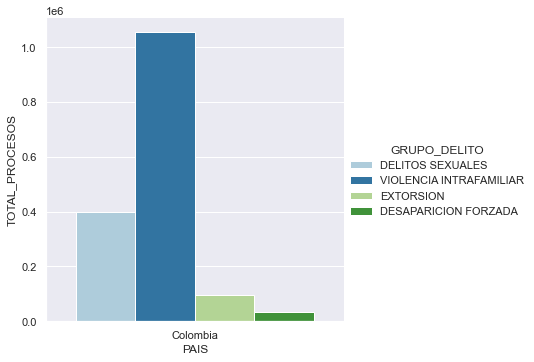

In [225]:
CONTEO_DE_PROCESOS1 = CONTEO_DE_PROCESOS[CONTEO_DE_PROCESOS.GRUPO_DELITO.isin(["DELITOS SEXUALES",'EXTORSION','VIOLENCIA INTRAFAMILIAR',
                                                                              'DESAPARICION FORZADA'])]

sns.catplot(data = CONTEO_DE_PROCESOS1, 
            kind = "bar",
            estimator = sum,
            x = "PAIS", 
            y = "TOTAL_PROCESOS", 
            hue = "GRUPO_DELITO",
            #col = "darkred",
            palette = 'Paired',
            ci = None)
plt.show()

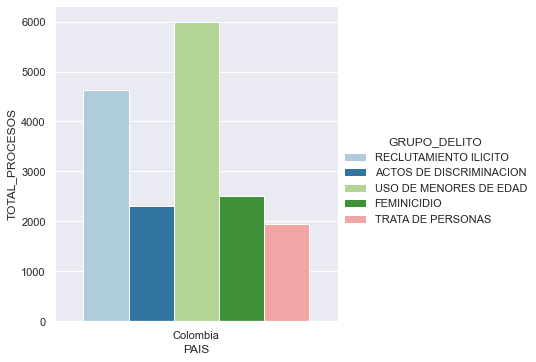

In [226]:
CONTEO_DE_PROCESOS1 = CONTEO_DE_PROCESOS[CONTEO_DE_PROCESOS.GRUPO_DELITO.isin(["ACTOS DE DISCRIMINACION",
                                                                              'FEMINICIDIO','RECLUTAMIENTO ILICITO','TRATA DE PERSONAS',
                                                                              'USO DE MENORES DE EDAD',"ACTOS DE DISCRIMINACION"])]

sns.catplot(data = CONTEO_DE_PROCESOS1, 
            kind = "bar",
            estimator = sum,
            x = "PAIS", 
            y = "TOTAL_PROCESOS", 
            hue = "GRUPO_DELITO",
            #col = "GRUPO_DELITO",
            palette = 'Paired',
            ci = None)
plt.show()

Se identifica que dentro de las clasificaciones a trabajar dentro de grupo de delitos existe una división entre los que tienen al menos 1 millon de casos y los que tienen hasta 6 mil, para el primer grupo se encuentran DESAPACION FORZADA, DELITOS SEXUALES, EXTORSION y VIOLENCIA INTRAFAMILIAR y en el segundo grupo se encuentran ACTOS DE DISCRIMINACION, FEMINICIDIO, RECLUTAMIENTO ILICITO, TRATA DE PERSONAS, USO DE MENORES DE EDAD y ACTOS DE DISCRIMINACION, esto en el caso de Colombia, pero ahora identificaremos que ocurre cuando se trata por departamento.

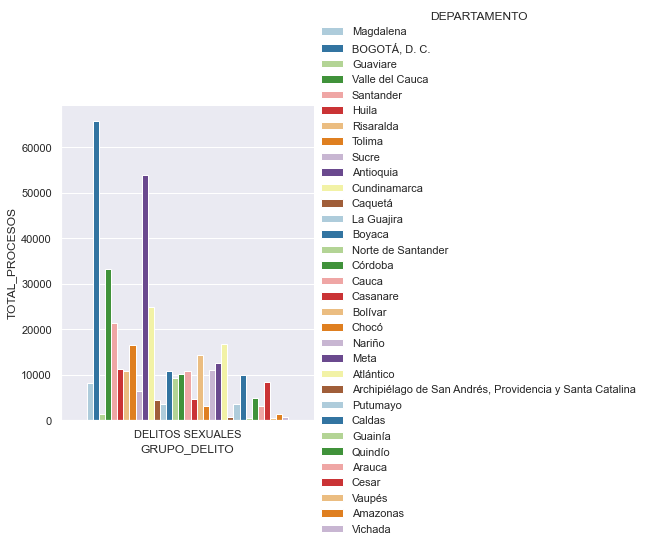

In [193]:
CONTEO_DE_PROCESOS1 = CONTEO_DE_PROCESOS[CONTEO_DE_PROCESOS.GRUPO_DELITO.isin(["DELITOS SEXUALES"])]

sns.catplot(data = CONTEO_DE_PROCESOS1, 
            kind = "bar",
            estimator = sum,
            x = "GRUPO_DELITO", 
            y = "TOTAL_PROCESOS", 
            hue = "DEPARTAMENTO",
            #col = "darkred",
            palette = 'Paired',
            ci = None)
plt.show()

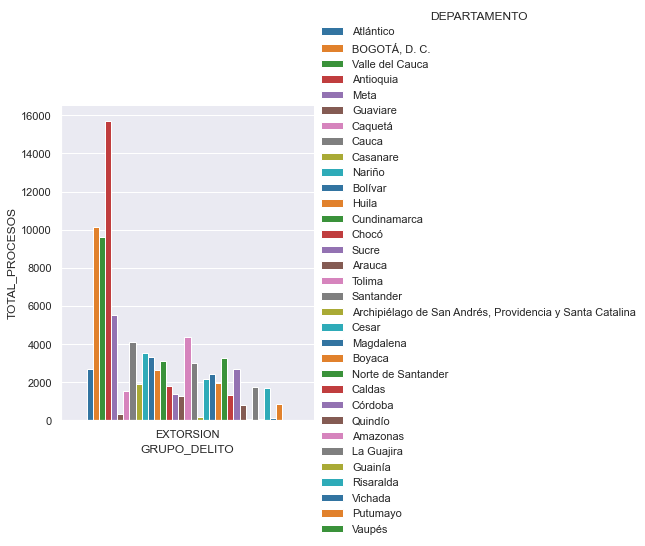

In [194]:
CONTEO_DE_PROCESOS1 = CONTEO_DE_PROCESOS[CONTEO_DE_PROCESOS.GRUPO_DELITO.isin(['EXTORSION'])]

sns.catplot(data = CONTEO_DE_PROCESOS1, 
            kind = "bar",
            estimator = sum,
            x = "GRUPO_DELITO", 
            y = "TOTAL_PROCESOS", 
            hue = "DEPARTAMENTO",
            #col = "Paired",
            palette = 'tab10',
            ci = None)
plt.show()

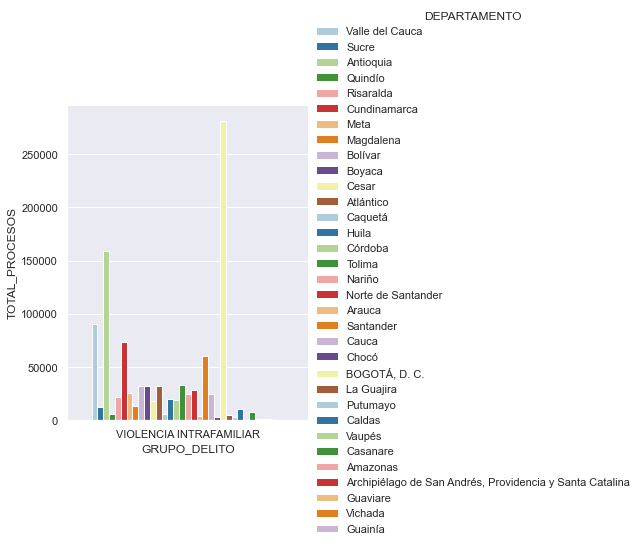

In [204]:
CONTEO_DE_PROCESOS1 = CONTEO_DE_PROCESOS[CONTEO_DE_PROCESOS.GRUPO_DELITO.isin(['VIOLENCIA INTRAFAMILIAR'])]

sns.catplot(data = CONTEO_DE_PROCESOS1, 
            kind = "bar",
            estimator = sum,
            x = "GRUPO_DELITO", 
            y = "TOTAL_PROCESOS", 
            hue = "DEPARTAMENTO",
            #col = "darkred",
            palette = 'Paired',
            ci = None)
plt.show()

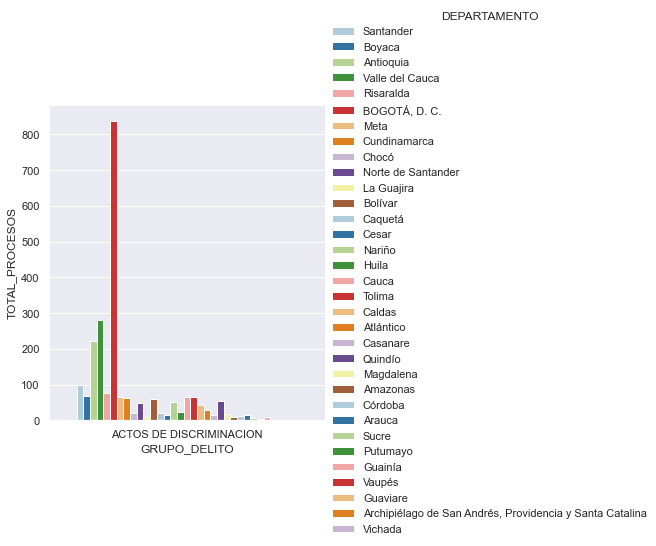

In [209]:
CONTEO_DE_PROCESOS1 = CONTEO_DE_PROCESOS[CONTEO_DE_PROCESOS.GRUPO_DELITO.isin(["ACTOS DE DISCRIMINACION"])]

sns.catplot(data = CONTEO_DE_PROCESOS1, 
            kind = "bar",
            estimator = sum,
            x = "GRUPO_DELITO", 
            y = "TOTAL_PROCESOS", 
            hue = "DEPARTAMENTO",
            #col = "darkred",
            palette = 'Paired',
            ci = None)
plt.show()

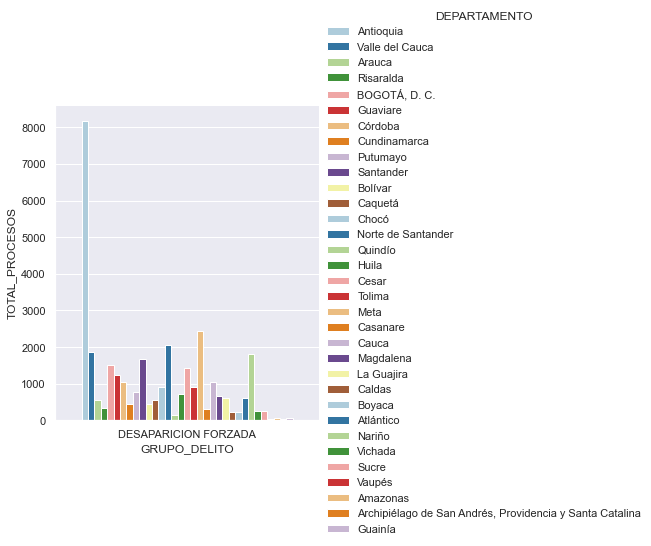

In [228]:
CONTEO_DE_PROCESOS1 = CONTEO_DE_PROCESOS[CONTEO_DE_PROCESOS.GRUPO_DELITO.isin(['DESAPARICION FORZADA'])]

sns.catplot(data = CONTEO_DE_PROCESOS1, 
            kind = "bar",
            estimator = sum,
            x = "GRUPO_DELITO", 
            y = "TOTAL_PROCESOS", 
            hue = "DEPARTAMENTO",
            #col = "darkred",
            palette = 'Paired',
            ci = None)
plt.show()

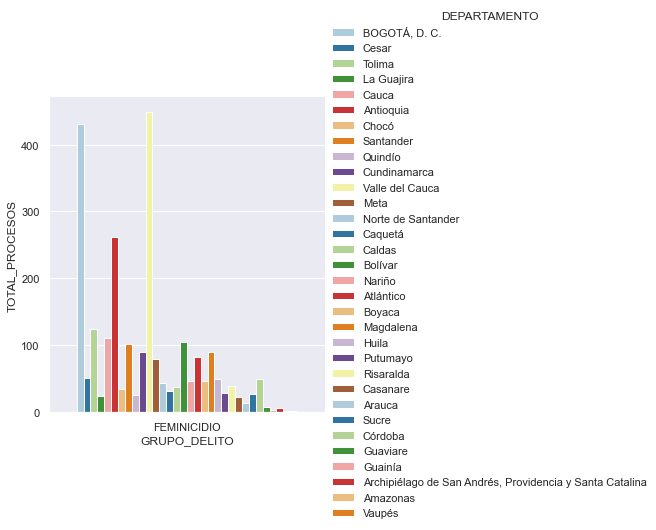

In [212]:
CONTEO_DE_PROCESOS1 = CONTEO_DE_PROCESOS[CONTEO_DE_PROCESOS.GRUPO_DELITO.isin(['FEMINICIDIO'])]

sns.catplot(data = CONTEO_DE_PROCESOS1, 
            kind = "bar",
            estimator = sum,
            x = "GRUPO_DELITO", 
            y = "TOTAL_PROCESOS", 
            hue = "DEPARTAMENTO",
            #col = "darkred",
            palette = 'Paired',
            ci = None)
plt.show()

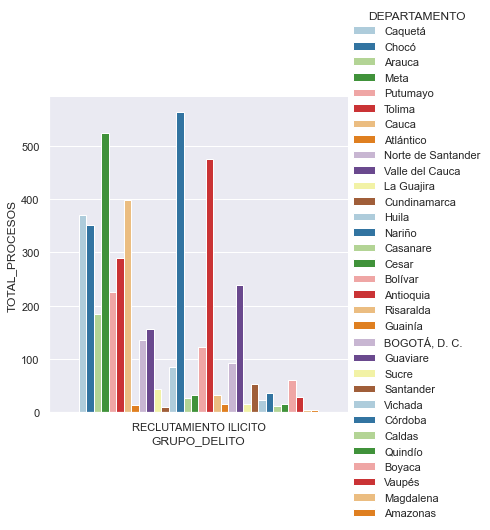

In [234]:
CONTEO_DE_PROCESOS1 = CONTEO_DE_PROCESOS[CONTEO_DE_PROCESOS.GRUPO_DELITO.isin(['RECLUTAMIENTO ILICITO'])]

sns.catplot(data = CONTEO_DE_PROCESOS1, 
            kind = "bar",
            estimator = sum,
            x = "GRUPO_DELITO", 
            y = "TOTAL_PROCESOS", 
            hue = "DEPARTAMENTO",
            #col = "darkred",
            palette = 'Paired',
            ci = None)
plt.show()

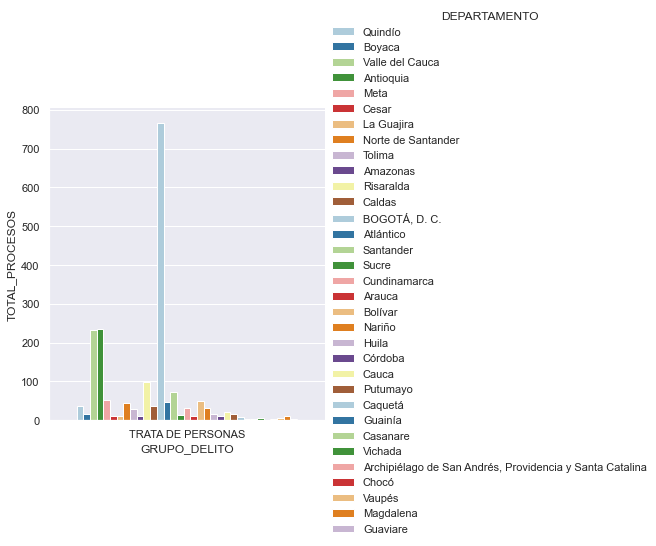

In [230]:
CONTEO_DE_PROCESOS1 = CONTEO_DE_PROCESOS[CONTEO_DE_PROCESOS.GRUPO_DELITO.isin(['TRATA DE PERSONAS'])]

sns.catplot(data = CONTEO_DE_PROCESOS1, 
            kind = "bar",
            estimator = sum,
            x = "GRUPO_DELITO", 
            y = "TOTAL_PROCESOS", 
            hue = "DEPARTAMENTO",
            #col = "darkred",
            palette = 'Paired',
            ci = None)
plt.show()

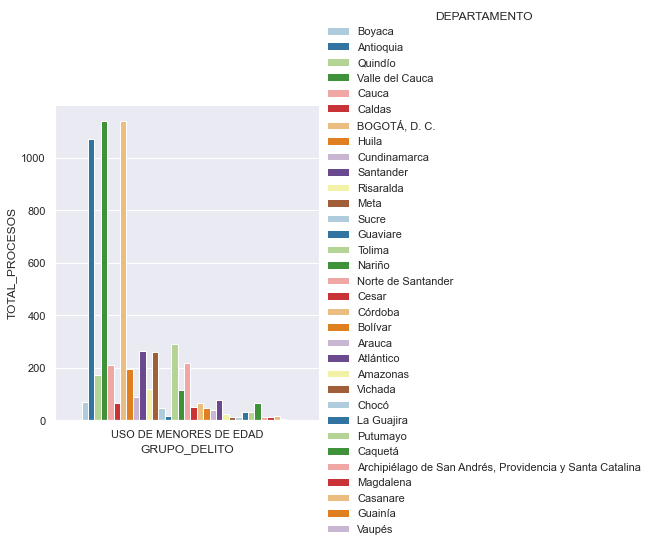

In [232]:
CONTEO_DE_PROCESOS1 = CONTEO_DE_PROCESOS[CONTEO_DE_PROCESOS.GRUPO_DELITO.isin(['USO DE MENORES DE EDAD'])]

sns.catplot(data = CONTEO_DE_PROCESOS1, 
            kind = "bar",
            estimator = sum,
            x = "GRUPO_DELITO", 
            y = "TOTAL_PROCESOS", 
            hue = "DEPARTAMENTO",
            #col = "darkred",
            palette = 'Paired',
            ci = None)
plt.show()

Por lo anterior para la segunda parte de este proyecto (segundo corte) se planteará ver a detalle para cada grupo de delito los siguientes municipios de la siguiente manera:

+ Delitos sexuales: 
        + Bogotá
        + Valle del Cauca
        + Antioquia
+ Extorción: 
        + Bogotá
        + Valle del Cauca
        + Antioquia
+ Violencia intrafamiliar:
        + Bogotá
        + Valle del Cauca
        + Antioquia
+ Actos de discriminación:
        + Bogotá
        + Valle del Cauca
        + Antioquia
+ Desaparición forzada:
        + Meta
        + Norte de Santander
        + Antioquia
+ Feminicidio
        + Bogotá
        + Valle del Cauca
        + Antioquia
+ Reclutamiento ilicito:
        + Cordoba
        + Meta
        + Antioquia
        + Caqueta
        + Choco
        + Cauca
+ Trata de personas:
        + Bogotá
        + Valle del Cauca
        + Antioquia
+ Uso de menores de edad:
        + Bogotá
        + Valle del Cauca
        + Antioquia
        
y es entonces en esta desagregación que se realizará el análisis con las demás covariables.

## Framework de las visualizaciones - María Alejandra Bolívar 

Para  el primer modismo se seleccionaron las variables Estado de la noticia, municipio, total de procesos, etapa y delito las cuales en la ficha tecnica de la fiscalia general significan lo siguiente: 

1. **Total procesos:**
Conteo total de las noticias criminales al cruzar las variables anteriores.

2. **Estado de la noticia:**
Estado de la noticia criminal al momento de la consulta del dato en el sistema de información: - Activo - Inactivo.

3. **Municipio:**
Municipio en donde presuntamente ocurrieron los hechos que conoció la Fiscalía.

4. **Etapa:**
Etapa procesal de la noticia criminal al momento de la consulta del dato en el sistema de información.

5. **Delito:**
Delito basado en la escripción del artículo según el Código Penal

6. **Año de echo**
Año en que presuntamente ocurrió el hecho.

7. **Año de denuncia**
Año en el que se denunció el hecho.

8. **imputación**
Indica si el caso tiene o no alguna actuación de imputación.

El modismo tiene como objetivo analizar y comparar cuantos procesos están activos e inactivos, en que municipios hay más procesos criminales, que tipo de delitos son más comunes, en qué etapa se encuentran y finalmente si hubo imputación de cargos o no,además se buscara mirar si en los procesos hay diferencia entre el año de hecho y el año de la denuncia. 

##### ***¿Qué?, ¿Porqué? y ¿Cómo?***

 #####  ¿Qué?

Basados en el Framework de Tamara, evidenciamos que el Dataset cuenta con atributos categóricos para casi todas las variables excepto las variables de año y total de procesos, municipio y imputación. Las varibles año y total de procesos son variables ordenadas cuantitativas y la variable total de procesos cuenta con una dirección secuencial, en el caso de la variable imputación esta cuenta con una escala lógica binaria de SI y NO, la variable municipio cuenta con datos de posición y no tienen un orden. El tipo de Data Set utilizado serán las tablas que contienen clasificaciones, son datos estáticos, es decir, que no cambian en el tiempo. Más adelante se puede hacer una visualización geoespacial.


#####  ¿Porqué? 

Esta visualización se quiere realizar porque cuenta con los sustantivos y verbos encargados de describir las acciones y objetivos de esta. En el caso de los verbos utilizados para la descripción de la visualización, se utilizaron el descubrir y presentar por medio de diferentes DataSet´s que valores atípicos, que comparaciones y que derivaciones pueden tener estas variables. En el caso de la variable municipio se usarán solo los que cuenten con más procesos ya que esta variable está muy desagregada y puede causar problemas visuales en las gráficas, se utilizara para comparar que tipo de delitos son los más frecuentes, en que etapa están este tipo de delitos y si hubo algún tipo de imputación de cargos. Para la variable etapa se puede hacer una derivación de atributos ya que lo que queremos saber es en que fase se encuentran este tipo de procesos y además si estos están activos o no. Con las variables de año lo que se quiere hacer es un paralelo para saber si el año de hecho del delito es diferente al año de la denuncia y de alguna u otra forma saber en que estado se encuentra ese delito.

En el caso de los sustantivos que se utilizaron para las variables se tienen en cuenta la dependencia, la similaridad y los datos extremos. Adicionalmente, su searh puede estar representado con un lookup, ya que lo que queremos es buscar e identificar qué pasa con esas variables en los diferentes ámbitos.


##### ¿Cómo?

En el como del Framework de Tamara lo que se quiere es saber de que manera fue echa la visualización, en este caso los atributos y las variables tendrán un color que los identifique, un tamaño y una forma. La visualización será estática, alineada y con dos ejes los cuales expliquen lo dicho anteriormente. Donde el eje “X” llevara la variable categórica y el eje “Y” la cuantitativa, dependiendo lo que se esté analizando. Al utilizar las variables escogidas las visualizaciones que se harán serán barplot´s, pie chart´s o Radial bar chart, en el caso de los barplot lo que se hará son comparaciones entre las diferentes variables, pero una de estas es el tipo de delito y la imputación que tuvieron, para la variable etapa se usara el Radial bar chart el cual nos revelara cuantos procesos hay con esa etapa. Y para la variable estado de la noticia también se harán comparaciones y se buscara analizar si el año afecta el estado en que se encuentre este proceso y por ultimo se hara un daset de partición y tendrá una reducción por ciertos filtros. 

##### ***Marcas y canales***


+ Los canales utilizados en las visualizaciones serán el área, el color, el volumen para cada atributo, el canal de posición espacial vertical para los atributos cuantitativos y el canal de posición espacial horizontal para los atributos categóricos. 

+ Las  marcas seran las líneas y las áreas.



Para las siguientes visualizaciones lo que se hará sera filtrar por municipio los cuales contengan mayor información.

In [40]:
CONTEO_DE_PROCESOS1 = CONTEO_DE_PROCESOS[CONTEO_DE_PROCESOS.MUNICIPIO.isin(["MEDELLÍN",'IBAGUÉ','VILLAVICENCIO','BUCARAMANGA','CALI','BOGOTÁ, D.C.',
                                           'CÚCUTA','CARTAGENA','PASTO','POPAYÁN','PEREIRA','SANTA MARTA','VALLEDUPAR','NEIVA',
                                            'MONTERÍA','MANIZALES','ARMENIA','SOACHA','BARRANCABERMEJA','PALMIRA','FLORENCIA',
                                            'BELLO','TUNJA','QUIBDO','SINCELEJO','ITAGUI','BUENAVENTURA','YOPAL','RIONEGRO','TULUA'])]

1. Lo primero que se quiere hacer es identificar cuantos procesos están activos e 
inactivos, se hará por medio de una tabla, luego se visualizara con un Piechart.

In [41]:
tab3 = CONTEO_DE_PROCESOS1['ESTADO_NOTICIA'].value_counts().rename_axis('label').reset_index(name='counts');tab3

,label,counts
0,INACTIVO,397259
1,ACTIVO,194340


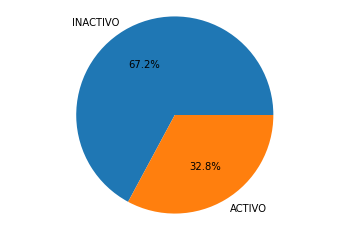

In [44]:
fig1, ax1 = plt.subplots()

ax1.pie(tab3['counts'], 
        labels=tab3['label'],autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Que:**
Basados en el Framework de Tamara, para esta primera visualización lo que se quiere representar es el estado de la noticia criminal al momento de la consulta del dato en el sistema de información, se encuentra evidenciado con un Dataset de tabla que contiene atributos categóricos, y luego explicado en porcentaje.

**Porque:**
Se quiere mirar el comportamiento y la proporción que tiene el estado de la noticia, donde se descubre y se analiza que tantos procesos están siendo revisados y que tantos no. Además, se identifican ciertas características y se pueden comparar con más cosas más adelantes. Está definida por la forma.

**Como:**
La visualización cuenta con una gráfica sencilla que compara dos categorías activo e inactivo, se hace por medio de un gráfico de torta, se dan sus respectivos porcentajes y utiliza el canal de color.


Los pasos de esta visualización fueron Codificar -> Analizar -> Filtrar -> Gráficar.

**Marcas y Canales:**
La visualización utiliza la marca de área, y los canales de color y volumen para cada atributo. Estas marcas y canales fueron escogidos ya que visualmente ayudan al receptor a entender lo que se quiere explicar. 


2. Teniendo en cuenta la primera visualización y sabiendo como se comportaron los datos, el siguiente paso será identificar para esos procesos activos cuantos están en cada etapa.

In [45]:
CONTEO_DE_activos = CONTEO_DE_PROCESOS1[CONTEO_DE_PROCESOS1.ESTADO_NOTICIA.isin(["ACTIVO"])]

In [46]:
tab4 = CONTEO_DE_activos['ETAPA'].value_counts().rename_axis('label').reset_index(name='counts')
tab4

,label,counts
0,INDAGACIÓN,107549
1,JUICIO,47382
2,QUERELLABLE,17696
3,INVESTIGACIÓN,17217
4,EJECUCIÓN DE PENAS,3050
5,TERMINACIÓN ANTICIPADA,1407
6,ETAPA DE INVESTIGACION PRELIMINAR,24
7,ETAPA DE INSTRUCCION,15


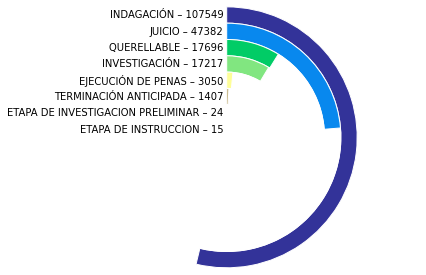

In [49]:
labels = tab4['label']
data = tab4['counts']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
    

plt.show()

**Que:**
En esta visualización lo que se quiere representar es la etapa en la que se en cuenta el proceso de los que están activos, se encuentra evidenciado con un Dataset de tabla que contiene atributos categóricos.

**Porque:**
Se quiere mirar la proporción y cuantos datos tiene cada etapa, con la cual se podrá analizar que tantos procesos están a en cada etapa . 

**Como:**
La visualización cuenta con una gráfica estática que compara diferentes categorías, se hace por medio de un Radial bar chart, donde se muestran sus respectivos valores.


Los pasos de esta visualización fueron Codificar -> Analizar -> Filtrar -> Gráficar.

**Marcas y Canales:**
La visualización utiliza la marca de área, se utilizan los canales de color y volumen para cada atributo de la etapa, son utilizados porque explican de mejor forma visual la etapa en la que esat cada proceso.

3. La siguiente visualización lo que quiere explicar es que de los procesos que están activos que municipios de los escogidos contienen más procesos y en que etapas se encuentran.  Además, se utilizará una visualización adicional que conjuntamente contiene el año de denuncia.


In [50]:
tab1 = pd.crosstab(CONTEO_DE_PROCESOS1["MUNICIPIO"],CONTEO_DE_PROCESOS1["ETAPA"])
tab1

ETAPA,EJECUCIÓN DE PENAS,ETAPA DE INSTRUCCION,ETAPA DE INVESTIGACION PRELIMINAR,INDAGACIÓN,INVESTIGACIÓN,JUICIO,QUERELLABLE,TERMINACIÓN ANTICIPADA
MUNICIPIO,,,,,,,,
ARMENIA,2325,1,170,7667,679,1807,2031,44
BARRANCABERMEJA,1727,0,0,7049,729,1967,1550,31
BELLO,1563,0,0,6714,368,996,1501,32
"BOGOTÁ, D.C.",15759,38,31,44635,5856,15385,10212,869
BUCARAMANGA,3737,7,1,13377,1340,4343,3367,182
BUENAVENTURA,1337,0,118,5649,580,1279,1271,22
CALI,8497,0,13,19948,3130,5537,4611,406
CARTAGENA,2258,8,4,11585,1350,2540,3200,157
CÚCUTA,3739,5,3,11545,1482,2941,2654,201


<AxesSubplot:xlabel='ETAPA', ylabel='MUNICIPIO'>

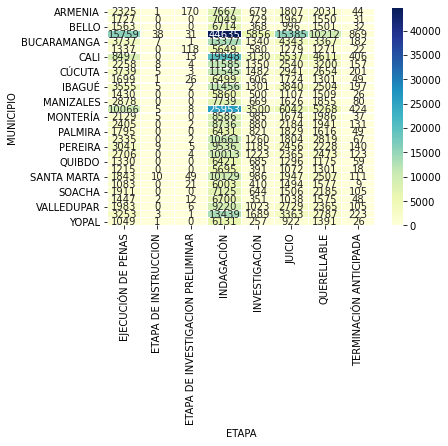

In [51]:
sns.heatmap(tab1,
                 annot=True, 
                 fmt="d",
                 linewidths=.1,
                 cmap="YlGnBu",
           )

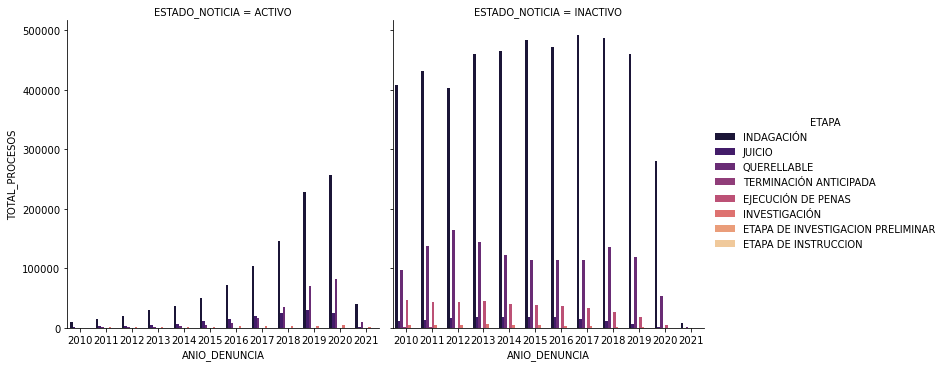

In [52]:
sns.catplot(data = CONTEO_DE_PROCESOS1,
            kind = "bar",
            estimator = sum,
            x = "ANIO_DENUNCIA", 
            y = "TOTAL_PROCESOS",
            hue = "ETAPA",
            col = "ESTADO_NOTICIA",
            palette = 'magma',
            ci = None)

**Que:**  En esta visualización lo que se quiere representar es la etapa en la que se en cuenta el proceso de los que están activos, se encuentra evidenciado con un Dataset de tabla que contiene atributos categóricos, y también se evidencia y se explica el total de procesos que hay en el año de denuncia.  

**Porque:**
Se quiere presentar cuantos datos existen por estado, por municipio, y por año, se utilizara el search, con el cual se identificara y se harán comparaciones.  

**Como:**
La visualización cuenta con una gráfica estática que compara diferentes categorías y  se hace por medio de un gráfico de barras.


**Marcas y Canales:**
La visualización utiliza la marca de lineas, se utilizan los canales de color para el total de los procesos . 

Esta visualización tiene como resultado poder hacer la comparación del año de denuncia con el año de hecho ya que es importante saber si hay diferencia entre estas dos fechas.

4. Ahora se hará la misma visualización pero con el año de hecho 

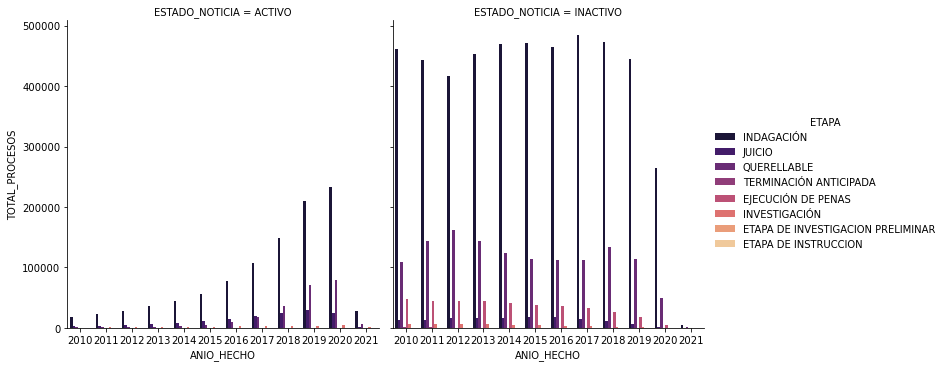

In [53]:
sns.catplot(data = CONTEO_DE_PROCESOS1,
            kind = "bar",
            estimator = sum,
            x = "ANIO_HECHO", 
            y = "TOTAL_PROCESOS",
            hue = "ETAPA",
            col = "ESTADO_NOTICIA",
            palette = 'magma',
            ci = None)

Como se puede notar no hay mucha diferencia entre las fechas ya que para casi todos los casos en el mismo año en que se hizo la denuncia, fue el año de hecho. Se ven unas pequeñas diferencias en los años de 2010 y 2011 para el estado inactivo. 

En el estado activo hay diferencia en el año 2010 puesto que en la gráfica del año de hecho  existen más datos que en la gráfica del año de denuncia. 

5. La siguiente visualización intenta explicar es que de los procesos que están activos que municipios de los escogidos contienen más procesos y en que etapas se encuentran, adicionalmente, se utilizara la variable total de procesos.

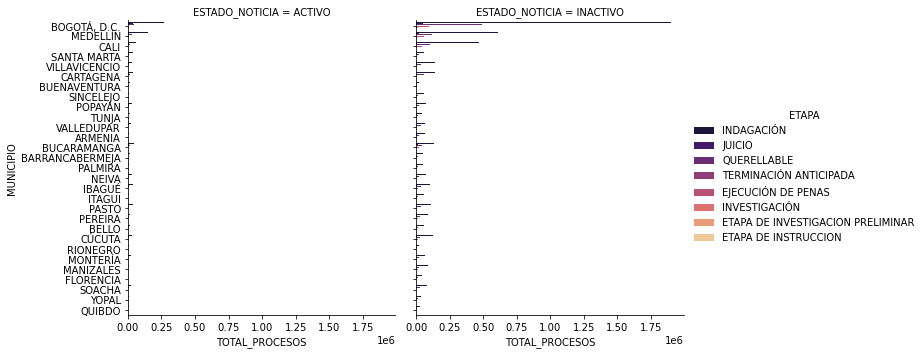

In [54]:
sns.catplot(data = CONTEO_DE_PROCESOS1,
            kind = "bar",
            estimator = sum,
            x = "TOTAL_PROCESOS", 
            y = "MUNICIPIO",
            hue = "ETAPA",
            col = "ESTADO_NOTICIA",
            palette = 'magma',
            ci = None)

**Que:** En esta visualización lo que se quiere explicar es que de las etapas en la que se en cuentran los procesos, de los municipios escogidos cuantos procesos exiten en cada uno, se hará por medio de un Dataset de tabla que contiene los diferentes atributos.

**Porque:** Se quiere mirar cuantos datos tiene cada municipio, que etapa es la que más se evidencia y en que estado es en que se encuentran estas.

**Como:** La visualización cuenta con una gráfica estática que compara diferentes categorías, se hace por medio de un gráfico de barras veritcal, donde se muestran sus respectivos valores.


**Marcas y Canales:** La visualización utiliza la marca de área, se utilizan los canales de color y volumen para cada atributo de la etapa, son utilizados porque explican de mejor forma visual la etapa en la que esta cada proceso.

En esta visualización se confirma que como hay pocos procesos activos ya que las barras son demasiado pequeñas y no las toma para los municipios filtrados, en el caso de los procesos inactivos si se puede ver que todos los municipios tienen valores por lo cual se confirma que los procesos inactivos son más comunes que los activos, además, que el municipio con más casos inactivos es Bogotá,  seguidos de Medellín y Cali, estos casos que son inactivos son más comunes en la etapa de indagación y juicio, por lo cual se da una idea acerca del objetivo del Framework. 

<AxesSubplot:xlabel='TOTAL_PROCESOS', ylabel='MUNICIPIO'>

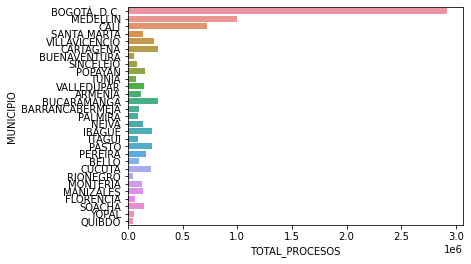

In [55]:
sns.barplot(data = CONTEO_DE_PROCESOS1,
            estimator = sum,
            x = "TOTAL_PROCESOS", 
            y = "MUNICIPIO",
            ci = None)

Para esta visualización lo que se quiere es ver que de los municipios escogidos cuales contenian más procesos para confirmar lo dicho anteriormente.